In [1]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Artificial Dataset

### make_regression
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

In [2]:
from sklearn.datasets import make_regression

In [3]:
X, Y = make_regression(n_samples=100, n_features=10)

In [4]:
X.shape

(100, 10)

In [5]:
Y.shape

(100,)

In [6]:
Y

array([  77.51690147,  203.81712558,  231.09187872,  -71.69041755,
        159.52439171,  -50.07384693, -200.41390534,  101.44353132,
       -107.16648707,  109.81889574, -185.17834643,  239.64456072,
        296.61324253,  390.83757246, -210.15055099, -151.71207915,
         84.9891654 ,   22.2982139 ,  225.63998884,   44.3696625 ,
        134.15022299, -229.90592292, -162.62050177, -191.65098374,
         61.76310127,  -17.61439284,  -51.90722329, -152.02326072,
        -87.8220835 ,  -70.98419285,  112.89305257,  -93.53728335,
        109.25542809,    3.39689955,  245.23618902,  121.11860231,
        -72.06361032, -215.49889182, -167.57721181,  343.59580759,
        107.53601773,  207.14458634,   25.13097777, -354.93361774,
         68.58097245,  132.29087744,  173.34815779,  -46.94863416,
         80.58042308,  -10.91789337, -124.28464903,  221.35927046,
        205.72063958,  127.54510575,  166.27344541, -252.71261213,
        -84.59007978,  -74.38328473,   68.68149663, -440.63791

In [7]:
df_features = pd.DataFrame(X, columns=['f1', 'f2', 
                                       'f3', 'f4', 
                                       'f5', 'f6', 
                                       'f7', 'f8', 
                                       'f9', 'f10'])

df_target = pd.DataFrame(Y, columns=["target"])

In [8]:
reg_df = pd.concat([df_features, df_target], axis=1)

In [9]:
reg_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
0,-0.140731,1.067117,0.285582,-0.299414,0.671173,-0.653239,1.589123,-0.809497,-1.182192,0.467977,77.516901
1,0.341516,-0.212181,1.249592,0.597496,0.298222,-0.648199,-0.062994,-1.490032,1.112608,0.756867,203.817126
2,0.405761,1.884979,-0.253051,1.325000,-2.410913,-0.787381,1.760348,-1.411549,1.305355,0.475529,231.091879
3,-0.085505,1.264558,-0.106221,-0.543980,-0.872195,-0.690893,0.498942,-2.082059,-0.804589,-0.071907,-71.690418
4,0.495592,0.374839,-0.614379,1.644534,-0.453998,1.852453,-0.653538,-0.541655,-0.010302,0.390210,159.524392


### make_classification
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, Y = make_classification(n_samples=100, 
                           n_features=10, 
                           n_classes=2)

In [12]:
X.shape

(100, 10)

In [13]:
Y.shape

(100,)

In [14]:
df_features = pd.DataFrame(X, columns=['f1', 'f2', 
                                       'f3', 'f4', 
                                       'f5', 'f6', 
                                       'f7', 'f8', 
                                       'f9', 'f10'])

df_target = pd.DataFrame(Y, columns=["labels"])

In [15]:
clf_df = pd.concat([df_features, df_target], axis=1)

In [16]:
clf_df.sample(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,labels
57,2.263995,0.939396,-0.147200,0.416858,0.609414,-1.546515,0.533087,1.257407,-0.837876,0.714535,0
62,0.339988,-0.810395,-1.363301,-0.992071,-0.854376,-0.327759,-0.335213,-1.484126,-1.085389,0.300051,0
37,-1.929477,0.993670,-1.754931,0.748206,1.549632,-0.396356,-2.885781,1.304819,0.439845,0.019755,1
14,-0.295927,0.282464,2.482839,0.489936,-0.478772,-0.043756,-0.400325,0.092130,1.844288,-0.998098,1
78,1.073136,-1.320957,0.700824,-0.981890,-0.038991,-0.641868,-0.680052,-1.567483,-0.872972,0.166211,0


### make_low_rank_matrix
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_low_rank_matrix.html#sklearn.datasets.make_low_rank_matrix

In [17]:
from sklearn.datasets import make_low_rank_matrix
from sklearn.decomposition import PCA

In [18]:
def variance_plt(n_samples=100, 
                 n_features=10, 
                 effective_rank=2, 
                 tail_strength=0.5):
    
    X = make_low_rank_matrix(n_samples=n_samples, 
                             n_features=n_features, 
                             effective_rank=effective_rank, 
                             tail_strength=tail_strength)
    
    pca = PCA(n_components=n_features)
    X_reduced = pca.fit_transform(X)
    
    cum_variance = np.cumsum(pca.explained_variance_ratio_)
    print('Cumulative Variance:\n', cum_variance)
    
    plt.plot(cum_variance)
    plt.xlabel('n components')
    plt.ylabel('cumulative variance')
    
    return {'matrix' : X, 'pca_model' : pca}


Cumulative Variance:
 [0.52179728 0.86546925 0.96277792 0.98072727 0.98608183 0.98960549
 0.99251197 0.99526589 0.99774965 1.        ]


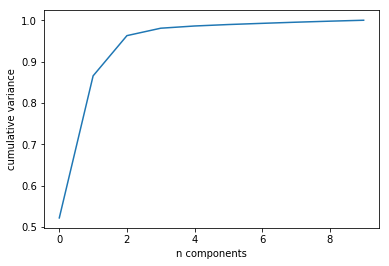

In [19]:
plot = variance_plt(tail_strength=0.1)

plt.show()

In [20]:
plot['pca_model'].explained_variance_

array([9.48177289e-03, 6.24499156e-03, 1.76823221e-03, 3.26164392e-04,
       9.72995722e-05, 6.40297003e-05, 5.28148995e-05, 5.00424477e-05,
       4.51332926e-05, 4.08919661e-05])

Cumulative Variance:
 [0.4786611  0.79744074 0.90487845 0.9362792  0.95173954 0.96345011
 0.97412482 0.98377438 0.99248933 1.        ]


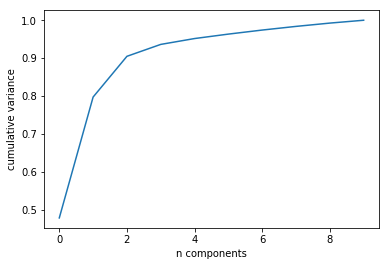

In [21]:
plot_1 = variance_plt(tail_strength=0.2)

plt.show()

Cumulative Variance:
 [0.4228359  0.71451521 0.83021571 0.87675808 0.90499981 0.92834308
 0.94916829 0.96750492 0.98454702 1.        ]


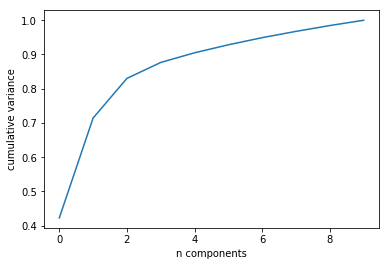

In [22]:
plot_2 = variance_plt(tail_strength=0.3)

plt.show()

Cumulative Variance:
 [0.26747374 0.47566592 0.60503304 0.68981843 0.75747656 0.81746795
 0.86970887 0.91547387 0.95984658 1.        ]


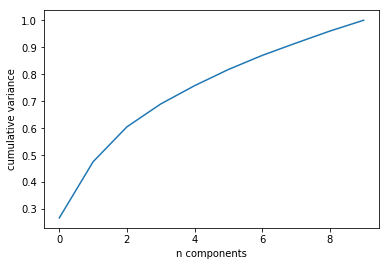

In [23]:
plot_5 = variance_plt(tail_strength=0.6)

plt.show()

Cumulative Variance:
 [0.16722593 0.32050986 0.44764091 0.55508528 0.65089269 0.73628445
 0.80870297 0.87841684 0.94213268 1.        ]


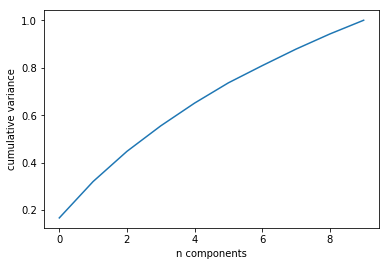

In [24]:
plot_8 = variance_plt(tail_strength=0.9)

plt.show()

### make_blobs
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [25]:
from sklearn.datasets import make_blobs

In [26]:
X, Y = make_blobs(n_samples=200, centers=5, n_features=2)

In [27]:
X.shape, Y.shape

((200, 2), (200,))

In [28]:
Y

array([3, 1, 4, 4, 1, 0, 2, 2, 0, 3, 3, 1, 1, 1, 3, 4, 0, 3, 4, 0, 2, 3,
       0, 4, 0, 4, 2, 1, 4, 1, 0, 3, 1, 0, 3, 2, 3, 1, 0, 1, 0, 0, 3, 3,
       2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 0, 3, 4, 2, 4, 0, 4, 3, 2, 2, 4,
       4, 4, 0, 2, 2, 1, 1, 0, 0, 0, 1, 4, 3, 1, 1, 2, 0, 2, 2, 2, 0, 1,
       4, 1, 2, 0, 2, 2, 1, 4, 1, 1, 2, 1, 4, 2, 4, 2, 1, 2, 0, 0, 3, 0,
       4, 1, 4, 4, 0, 3, 4, 4, 4, 2, 2, 3, 3, 1, 3, 3, 1, 2, 2, 3, 3, 2,
       0, 3, 0, 3, 4, 1, 3, 4, 1, 1, 1, 3, 3, 3, 0, 1, 0, 0, 3, 4, 3, 1,
       4, 4, 3, 2, 3, 4, 3, 0, 1, 3, 1, 0, 3, 0, 3, 4, 4, 0, 2, 2, 2, 4,
       0, 2, 0, 1, 4, 4, 2, 0, 1, 4, 2, 0, 3, 2, 1, 2, 0, 0, 0, 2, 1, 4,
       4, 3])

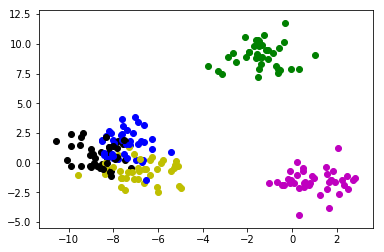

In [29]:
for i in range(len(X)):
    colors = ['k', 'b', 'g', 'y', 'm', 'c']
    plt.scatter(X[i][0], X[i][1], c=colors[Y[i]])
    
plt.show()

### make_circles
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles

In [30]:
from sklearn.datasets import make_circles

In [31]:
X, color = make_circles(n_samples=200, noise=0.05, factor=0.5)

In [32]:
X.shape

(200, 2)

In [33]:
color.shape

(200,)

In [34]:
color

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

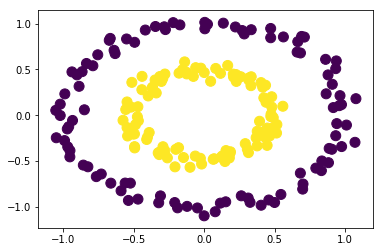

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=color, s=100)

plt.show()

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, color_train, color_test = \
        train_test_split(X, color, test_size=0.3)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
svc_model = DecisionTreeClassifier(max_depth=10).fit(x_train, color_train)

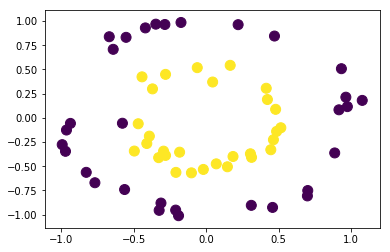

In [39]:
color_pred = svc_model.predict(x_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=color_pred, s=100)

plt.show()

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(color_test, color_pred)

0.9833333333333333

### make_s_curve
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_s_curve.html#sklearn.datasets.make_s_curve

In [41]:
from sklearn.datasets import make_s_curve

In [42]:
X, color = make_s_curve(n_samples=1000)

In [43]:
X.shape

(1000, 3)

In [44]:
color.shape

(1000,)

In [45]:
from mpl_toolkits.mplot3d import Axes3D

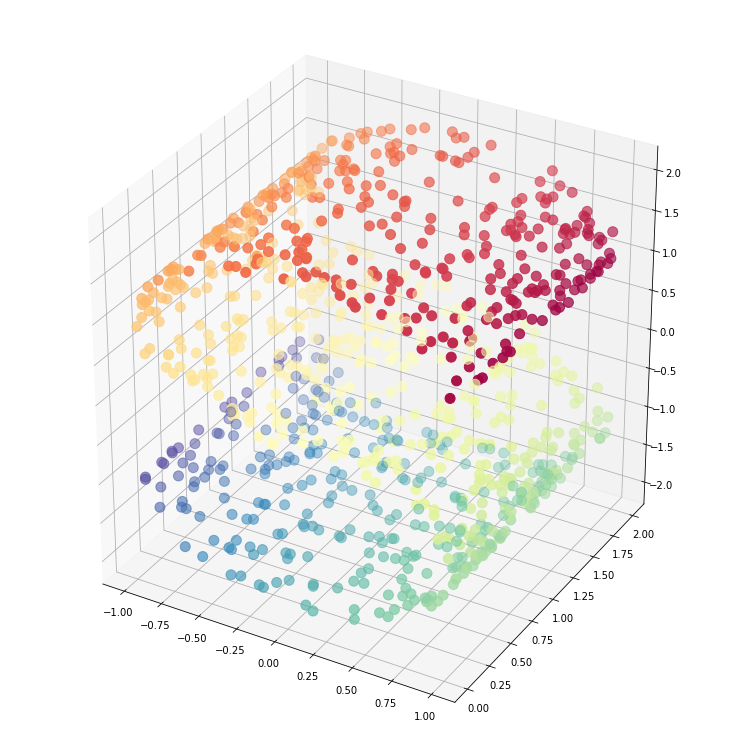

In [46]:
fig = plt.figure(figsize=(75, 30))

ax = fig.add_subplot(251, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
           c=color, 
           cmap=plt.cm.Spectral, s=100)

plt.show()

### LocallyLinearEmbedding
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

In [47]:
from sklearn.manifold import LocallyLinearEmbedding

In [48]:
model = LocallyLinearEmbedding(n_neighbors = 15, 
                               n_components = 2, 
                               method = 'hessian')
lle = model.fit_transform(X)

In [49]:
lle

array([[-0.01555582,  0.04351659],
       [-0.00289671,  0.02876353],
       [-0.00831964, -0.01893407],
       ...,
       [ 0.02130911, -0.01594665],
       [-0.00091603, -0.05662605],
       [ 0.02540423, -0.01198177]])

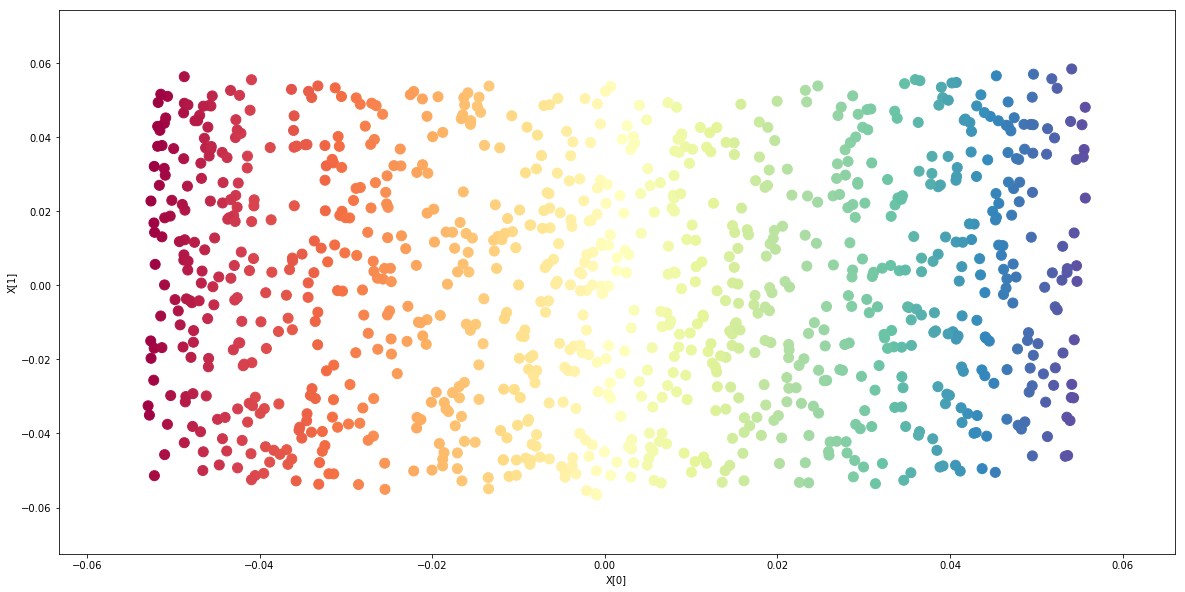

In [50]:
plt.figure(figsize=(20, 10))

plt.scatter(lle[:,0], lle[:,1], 
            c = color, 
            cmap = plt.cm.Spectral, 
            s=100)

plt.xlabel('X[0]')
plt.ylabel('X[1]')

plt.show()

### make_swiss_roll
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html#sklearn.datasets.make_swiss_roll

In [51]:
from sklearn.datasets import make_swiss_roll

In [52]:
X, color = make_swiss_roll(n_samples=1000)

In [53]:
X.shape

(1000, 3)

In [54]:
color.shape

(1000,)

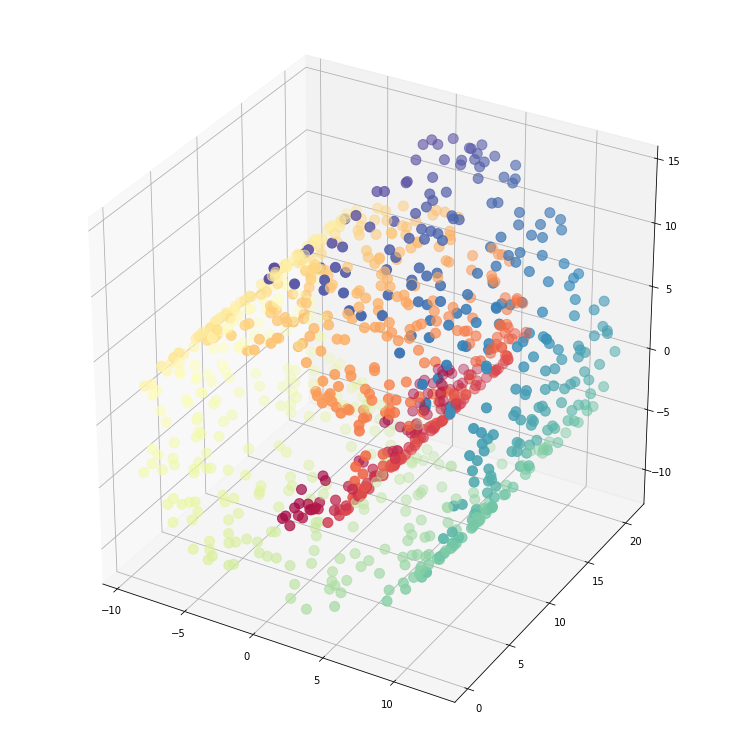

In [55]:
fig = plt.figure(figsize=(75, 30))

ax = fig.add_subplot(251, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral, s=100)

plt.show()

In [56]:
from sklearn.manifold import Isomap

In [57]:
model = Isomap(n_neighbors = 10, n_components = 2)
iso = model.fit_transform(X)

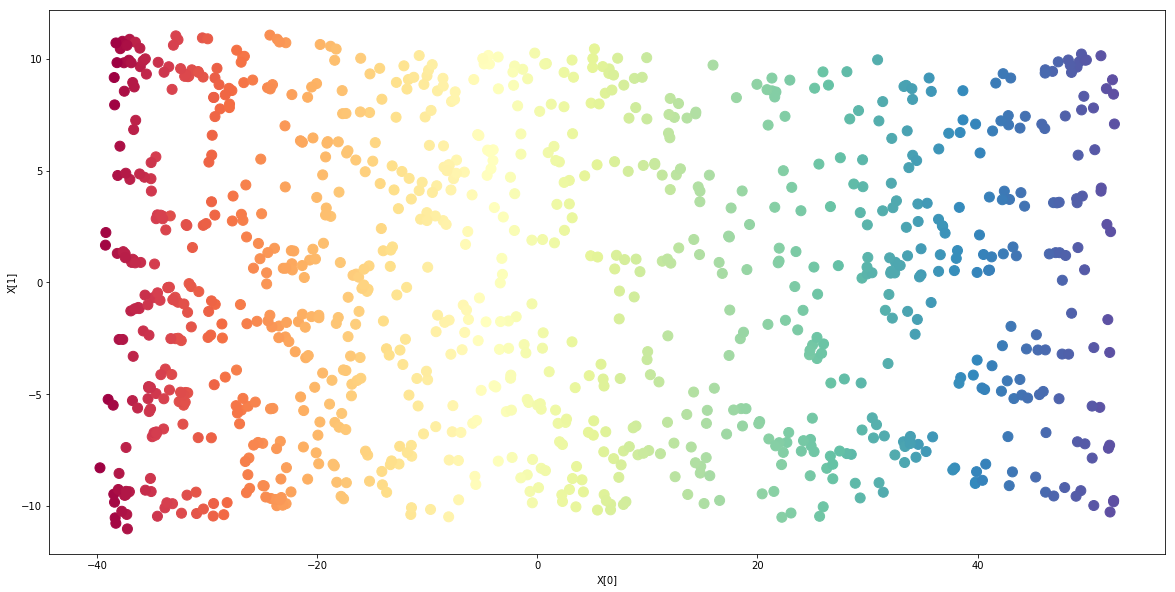

In [58]:
plt.figure(figsize=(20, 10))

plt.scatter(iso[:,0], iso[:,1], c = color, cmap = plt.cm.Spectral, s=100)

plt.xlabel('X[0]')
plt.ylabel('X[1]')

plt.show()